In [75]:
#!pip install --upgrade tensorflow
!pip install keras==2.12.0

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor


In [77]:
dataset =  pd.read_csv('/content/drive/MyDrive/AI Flood Alert Chatbot (1)/Metrological datasets/Sukkur_Daily_Data.csv')
print(dataset)

                 date_time  maxtempC  mintempC  totalSnow_cm  sunHour  \
0      2009-01-01 00:00:00        23        13             0       10   
1      2009-01-01 03:00:00        23        13             0       10   
2      2009-01-01 06:00:00        23        13             0       10   
3      2009-01-01 09:00:00        23        13             0       10   
4      2009-01-01 12:00:00        23        13             0       10   
...                    ...       ...       ...           ...      ...   
43803  2023-12-30 09:00:00        27        16             0       10   
43804  2023-12-30 12:00:00        27        16             0       10   
43805  2023-12-30 15:00:00        27        16             0       10   
43806  2023-12-30 18:00:00        27        16             0       10   
43807  2023-12-30 21:00:00        27        16             0       10   

       uvIndex  moon_illumination  moonrise   moonset   sunrise  ...  \
0            5                 31  10:14 AM  10:02 

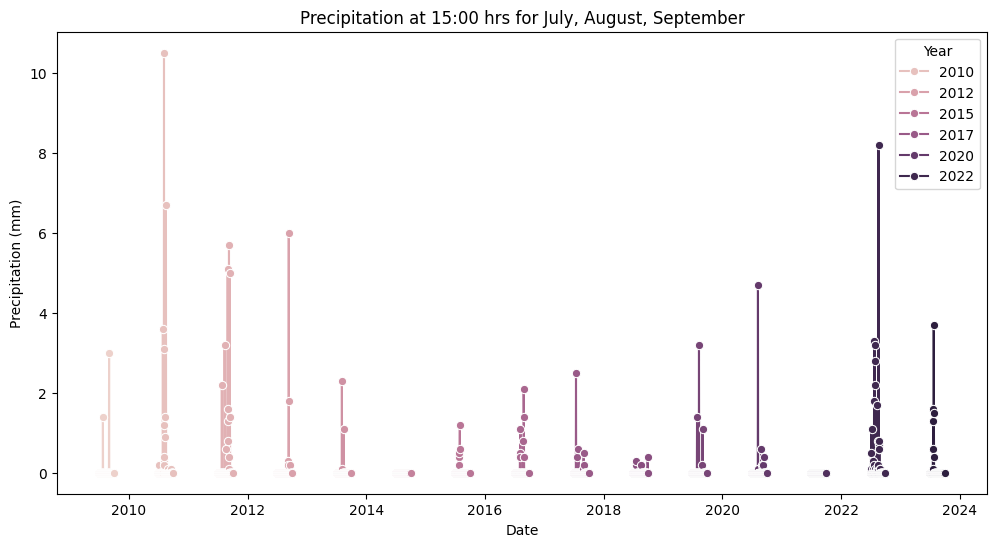

In [78]:
# Assuming your dataset is stored in a DataFrame named 'df'
# Convert 'date_time' column to datetime format
import seaborn as sns
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

# Extract month, hour, and year columns
dataset['month'] = dataset['date_time'].dt.month
dataset['hour'] = dataset['date_time'].dt.hour
dataset['year'] = dataset['date_time'].dt.year

# Filter data for July, August, and September at 15:00 hrs
filtered_data = dataset[(dataset['month'].isin([7, 8, 9])) & (dataset['hour'] == 15)]

# Create a plot using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_time', y='precipMM', data=filtered_data, hue='year', marker='o')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title('Precipitation at 15:00 hrs for July, August, September')

# Show legend
plt.legend(title='Year', loc='upper right')

# Show the plot
plt.show()


import pandas as pd

# Assuming your dataset is stored in a DataFrame named 'df'
# Convert 'date_time' column to datetime format
+/
dataset['date_time'] = pd.to_datetime(dataset['date_time'])

# Extract date column
dataset['date'] = dataset['date_time'].dt.date

# Group by date and calculate mean for all features except 'precipMM'
daily_avg = dataset.groupby('date').agg({
    'maxtempC': 'mean',
    'mintempC': 'mean',
    'totalSnow_cm': 'mean',
    'sunHour': 'mean',
    'uvIndex': 'mean',
    'moon_illumination': 'mean',
    'tempC': 'mean',
    'visibility': 'mean',
    'winddirDegree': 'mean',
    'windspeedKmph': 'mean',
    'WindGustKmph': 'mean',
    'cloudcover': 'mean',
    'humidity': 'mean',
    'pressure': 'mean',
    'location': 'last',  # Take the last location value
}).reset_index()

# Sum 'precipMM' values for each day
daily_precip_sum = dataset.groupby('date')['precipMM'].sum().reset_index()

# Merge the daily averages and daily precipitation sums
result_df = pd.merge(daily_avg, daily_precip_sum, on='date')

# Print the resulting DataFrame
print(result_df)
+/#

In [79]:
dataset.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,month,hour,year
0,2009-01-01 00:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,0.0,1017,15,10,63,3,Sukkur,1,0,2009
1,2009-01-01 03:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,0.0,1016,13,10,65,5,Sukkur,1,3,2009
2,2009-01-01 06:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,0.0,1018,14,10,99,5,Sukkur,1,6,2009
3,2009-01-01 09:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,0.0,1019,18,10,49,3,Sukkur,1,9,2009
4,2009-01-01 12:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,0.0,1016,22,10,82,5,Sukkur,1,12,2009


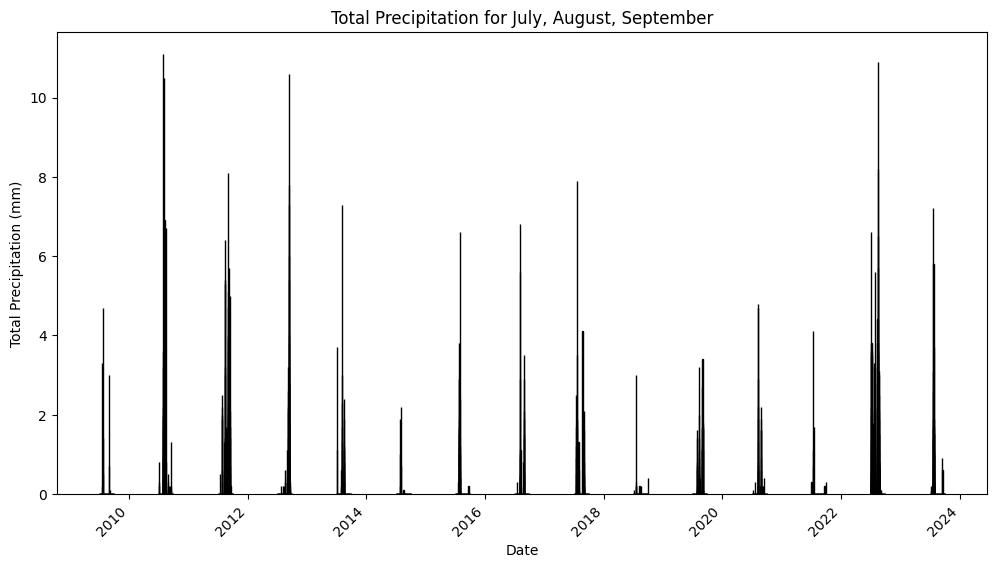

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import viridis


# Assuming your dataset is stored in a DataFrame named 'result_df' from the previous code

# Convert 'date' column to datetime format
dataset['date'] = pd.to_datetime(dataset['date_time'])

# Extract month column
dataset['month'] = dataset['date'].dt.month

# Filter data for July, August, and September
filtered_data = dataset[dataset['month'].isin([7, 8, 9])]

# Create a bar plot using matplotlib
plt.figure(figsize=(12, 6))
plt.bar(filtered_data['date'], filtered_data['precipMM'], color=viridis(filtered_data['precipMM'] / filtered_data['precipMM'].max()), edgecolor='black')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Total Precipitation (mm)')
plt.title('Total Precipitation for July, August, September')

# Format x-axis labels to show dates
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


In [81]:
#dataset.head()
result_df = dataset
result_df.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,month,hour,year,date
0,2009-01-01 00:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,1017,15,10,63,3,Sukkur,1,0,2009,2009-01-01 00:00:00
1,2009-01-01 03:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,1016,13,10,65,5,Sukkur,1,3,2009,2009-01-01 03:00:00
2,2009-01-01 06:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,1018,14,10,99,5,Sukkur,1,6,2009,2009-01-01 06:00:00
3,2009-01-01 09:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,1019,18,10,49,3,Sukkur,1,9,2009,2009-01-01 09:00:00
4,2009-01-01 12:00:00,23,13,0,10,5,31,10:14 AM,10:02 PM,07:16 AM,...,1016,22,10,82,5,Sukkur,1,12,2009,2009-01-01 12:00:00


In [82]:
X = result_df.drop(['precipMM',   'moon_illumination', 'totalSnow_cm', 'moonrise', 'moonset', 'sunrise',  'sunset',  'visibility', 'sunHour', 'date', 'year', 'hour', 'month', 'date_time', 'location'], axis=1)
Y = result_df['precipMM']
Y = Y.values.reshape(-1, 1)


In [83]:
X.head()

,maxtempC,mintempC,uvIndex,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,pressure,tempC,winddirDegree,windspeedKmph
0,23,13,5,3,16,15,16,7,6,46,1017,15,63,3
1,23,13,5,2,13,13,13,10,8,47,1016,13,65,5
2,23,13,5,3,15,14,15,11,2,46,1018,14,99,5
3,23,13,5,8,18,18,18,3,4,28,1019,18,49,3
4,23,13,5,9,22,24,22,9,32,23,1016,22,82,5


In [84]:
print(X)
print(Y)

       maxtempC  mintempC  uvIndex  DewPointC  FeelsLikeC  HeatIndexC  \
0            23        13        5          3          16          15   
1            23        13        5          2          13          13   
2            23        13        5          3          15          14   
3            23        13        5          8          18          18   
4            23        13        5          9          22          24   
...         ...       ...      ...        ...         ...         ...   
43803        27        16        6         -1          19          19   
43804        27        16        6         -2          24          24   
43805        27        16        6         -2          25          25   
43806        27        16        6         -2          22          22   
43807        27        16        6         -1          20          20   

       WindChillC  WindGustKmph  cloudcover  humidity  pressure  tempC  \
0              16             7           6      

In [85]:
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
#Y_scaled = scaler_Y.fit_transform(Y)


In [86]:
# Split the data into training, validation, and testing sets
#X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, Y_scaled, test_size=0.3, random_state=42)
#X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train1, X_test, Y_train1, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train1, Y_train1, test_size=0.28, random_state=42)

In [87]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(22078, 14)
(22078, 1)
(8587, 14)
(8587, 1)
(13143, 14)
(13143, 1)


In [88]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_absolute_error


# # Define the function to build the regressor
# def build_regressor(units, activation, dense_layers):
#     regressor = Sequential()
#     regressor.add(Dense(units=units[0], input_dim=X_train.shape[1], activation=activation[0]))

#     # Adding additional dense layers
#     for units, activation in zip(dense_layers['units'], dense_layers['activation']):
#         regressor.add(Dense(units=units, activation=activation))

#     regressor.add(Dense(units=1, activation='linear'))
#     regressor.compile(optimizer='adam', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError'])
#     return regressor

# # Define hyperparameters to search
# units_values = [17, 32, 64]
# activation_values = ['elu', 'relu']
# dense_layers_values = [
#     {'units': [8, 4], 'activation': ['relu', 'elu']},
#     {'units': [16, 8, 4], 'activation': ['relu', 'elu', 'relu']}
# ]

# best_params = None
# best_score = float('inf')  # Initialize with a high value for minimization

# # Hyperparameter search loop
# for units in units_values:
#     for activation in activation_values:
#         for dense_layers in dense_layers_values:
#             params = {'units': (units,), 'activation': (activation,), 'dense_layers': dense_layers}

#             regressor = KerasRegressor(build_fn=build_regressor, epochs=10, batch_size=32, verbose=0, **params)
#             regressor.fit(X_train, y_train)

#             y_pred = regressor.predict(X_val)
#             score = mean_absolute_error(y_val, y_pred)

#             print(f"Parameters: {params}, Score: {score}")

#             if score < best_score:
#                 best_score = score
#                 best_params = params

# # Print the best parameters and corresponding score
# print("Best Parameters: ", best_params)
# print("Best Score: ", best_score)


In [89]:
# from keras.models import Sequential
# from keras.layers import Dense

# # Best hyperparameters
# best_units = 32
# best_activation = 'relu'
# best_dense_layers = {'units': [8, 4], 'activation': ['relu', 'elu']}

# # Build the best model
# best_regressor = Sequential()
# best_regressor.add(Dense(units=best_units, input_dim=X_train.shape[1], activation=best_activation))

# # Adding additional dense layers
# for units, activation in zip(best_dense_layers['units'], best_dense_layers['activation']):
#     best_regressor.add(Dense(units=units, activation=activation))

# best_regressor.add(Dense(units=1, activation='linear'))
# best_regressor.compile(optimizer='adam', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError'])
# best_regressor.summary()

In [90]:
# Train the model
# history = best_regressor.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

In [91]:
# # Plot training loss and validation loss
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

In [92]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=17, input_dim=X_train.shape[1], activation='elu'))
    regressor.add(Dense(units=1, activation='linear'))
    regressor.compile(optimizer='adam', loss='MeanAbsoluteError', metrics=['MeanAbsoluteError'])
    return regressor

In [93]:
# Custom KerasRegressor wrapper
def custom_keras_regressor():
    return KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)


In [94]:
# Create the KerasRegressor using the custom wrapper
regressor = custom_keras_regressor()

<ipython-input-93-e4d773cacaa2>:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  return KerasRegressor(build_fn=build_regressor, batch_size=32, epochs=100)


In [95]:
# Train the model
history = regressor.fit(X_train, y_train, validation_data=(X_val, y_val))

Epoch 1/100
690/690 [==============================] - 3s 3ms/step - loss: 0.0856 - mean_absolute_error: 0.0856 - val_loss: 0.0467 - val_mean_absolute_error: 0.0467
Epoch 2/100
690/690 [==============================] - 2s 3ms/step - loss: 0.0399 - mean_absolute_error: 0.0399 - val_loss: 0.0369 - val_mean_absolute_error: 0.0369
Epoch 3/100
690/690 [==============================] - 2s 3ms/step - loss: 0.0334 - mean_absolute_error: 0.0334 - val_loss: 0.0338 - val_mean_absolute_error: 0.0338
Epoch 4/100
690/690 [==============================] - 3s 4ms/step - loss: 0.0303 - mean_absolute_error: 0.0303 - val_loss: 0.0308 - val_mean_absolute_error: 0.0308
Epoch 5/100
690/690 [==============================] - 2s 3ms/step - loss: 0.0284 - mean_absolute_error: 0.0284 - val_loss: 0.0307 - val_mean_absolute_error: 0.0307
Epoch 6/100
690/690 [==============================] - 2s 2ms/step - loss: 0.0275 - mean_absolute_error: 0.0275 - val_loss: 0.0292 - val_mean_absolute_error: 0.0292
Epoch 7/10

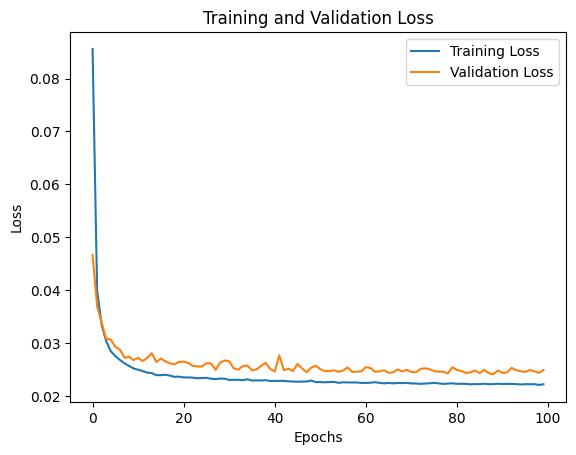

In [97]:
# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

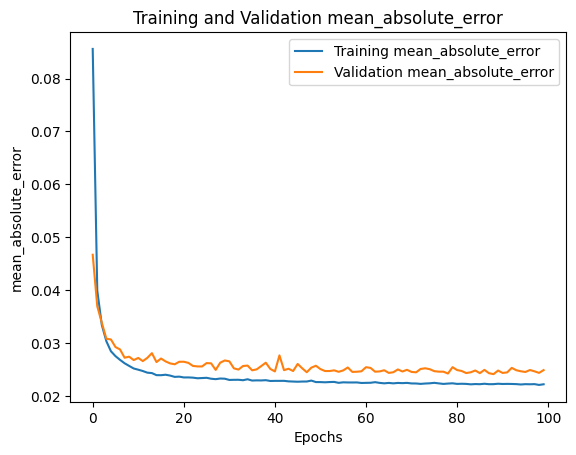

In [98]:
# Plot training loss and validation loss
plt.plot(history.history['mean_absolute_error'], label='Training mean_absolute_error')
plt.plot(history.history['val_mean_absolute_error'], label='Validation mean_absolute_error')
plt.title('Training and Validation mean_absolute_error')
plt.xlabel('Epochs')
plt.ylabel('mean_absolute_error')
plt.legend()
plt.show()

In [100]:
from sklearn.metrics import mean_squared_error

test_predictions = regressor.predict(X_test)

# Calculate the mean squared error
test_loss = mean_squared_error(y_test, test_predictions)
print("Test Loss:", test_loss)

411/411 [==============================] - 1s 1ms/step
Test Loss: 0.08704200041282438


In [101]:
predicted = regressor.predict(X_test)

411/411 [==============================] - 1s 2ms/step


In [104]:
for i in range(200, 210):
  print(f'Actual: {y_test[i][0]} : Predicted {predicted[i]}')

Actual: 0.0 : Predicted -0.001757691614329815
Actual: 0.0 : Predicted -0.0011169640347361565
Actual: 0.0 : Predicted -0.0005067558959126472
Actual: 2.0 : Predicted 0.03824032470583916
Actual: 0.0 : Predicted 0.0011440897360444069
Actual: 0.0 : Predicted 7.592421025037766e-05
Actual: 0.0 : Predicted -0.0020646778866648674
Actual: 0.0 : Predicted 0.0009075934067368507
Actual: 0.0 : Predicted 0.0026061581447720528
Actual: 0.0 : Predicted -0.0008700070902705193
